## packages

In [1]:
################################################################################################
################################################################################################

import os

import sys

################################################################################################

import numpy as np

import pandas as pd

################################################################################################

import networkx as nx

################################################################################################

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from matplotlib.patches import Ellipse, Circle

################################################################################################


## network

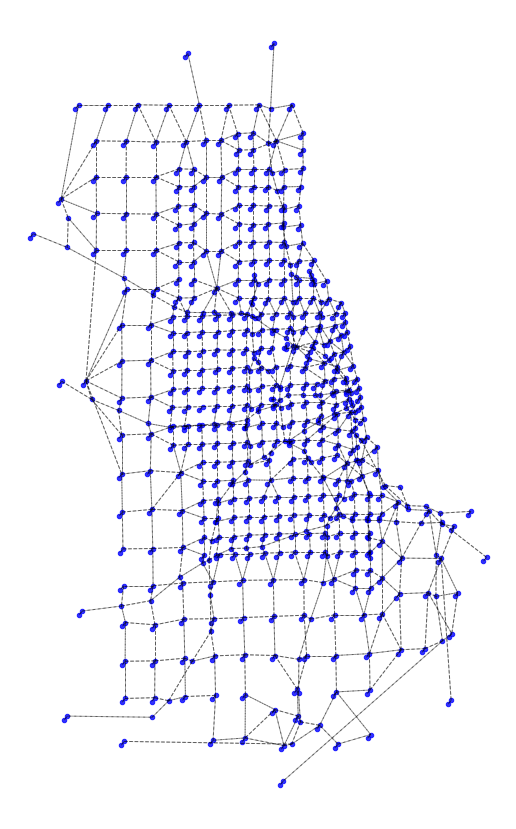

In [2]:
################################################################################################
################################################################################################
################################################################################################
################################################################################################

points = pd.read_csv("./Chicago-Sketch/ChicagoSketch_node.tntp", sep='\t')

points = points[['node','X','Y']]

################################################################################################
################################################################################################

points_dic={}

X=list()

Y=list()

for idx,row in points.iterrows():
    
    points_dic[int(row['node'])] = (row['X'],row['Y'])
    
    X.append(row['X'])
    
    Y.append(row['Y'])
    
################################################################################################
################################################################################################

network = pd.read_csv("./Chicago-Sketch/ChicagoSketch_net.tntp", skiprows=8, sep='\t')

network = network[['init_node', 'term_node', 'capacity', 'length', 'free_flow_time','b', 'power', 'speed', 'toll', 'link_type']]

network

################################################################################################
################################################################################################

Points=list(set(network.init_node.to_list()))

Edges=list()

for idx,row in network.iterrows():
    
    edge=(int(row['init_node']),int(row['term_node']),int(0.7*row['free_flow_time']))
    
    Edges.append(edge)

    
np.save('./Data/Chicago_Points',Points)

np.save('./Data/Chicago_Edges',Edges)

np.save('./Data/Chicago_X',X)

np.save('./Data/Chicago_Y',Y)

################################################################################################
################################################################################################
################################################################################################
################################################################################################

figsize = 9,15

fig,ax = plt.subplots(figsize=figsize)

ax.scatter(X,Y,c='blue',alpha=.8,linewidths=1,s=20)

for edge in Edges:
    
    in_node=edge[0]
    
    out_node=edge[1]
    
    in_x,in_y=points_dic[in_node][0],points_dic[in_node][1]
    
    out_x,out_y=points_dic[out_node][0],points_dic[out_node][1]
    
    ax.plot([in_x,out_x],[in_y,out_y],linestyle='--',color='k',alpha=0.4,linewidth=1)

plt.xticks([])  

plt.yticks([]) 

plt.axis('off') 

plt.show()


